In [40]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

In [41]:
# Set poll data as pandas DataFrame
poll_df = pd.read_csv('desktop/2016-general-election-trump-vs-clinton-vs-johnson.csv')

# Let's get a glimpse at the data
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 18 columns):
Pollster                  906 non-null object
Start Date                906 non-null object
End Date                  906 non-null object
Entry Date/Time (ET)      906 non-null object
Number of Observations    617 non-null float64
Population                906 non-null object
Mode                      906 non-null object
Trump                     906 non-null float64
Clinton                   906 non-null float64
Johnson                   242 non-null float64
Other                     539 non-null float64
Undecided                 861 non-null float64
Pollster URL              906 non-null object
Source URL                906 non-null object
Partisan                  906 non-null object
Affiliation               906 non-null object
Question Text             235 non-null object
Question Iteration        906 non-null int64
dtypes: float64(6), int64(1), object(11)
memory usage: 127.5+ 

In [42]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Johnson,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Morning Consult,2016-08-11,2016-08-14,2016-08-15T18:50:05Z,2001.0,Registered Voters,Internet,37.0,44.0,NaN,NaN,18.0,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/08/14/poll-tru...,Nonpartisan,None,If the 2016 presidential election were held to...,1
1,Morning Consult,2016-08-11,2016-08-14,2016-08-15T18:50:05Z,740.0,Registered Voters - Democrat,Internet,8.0,83.0,NaN,NaN,9.0,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/08/14/poll-tru...,Nonpartisan,None,If the 2016 presidential election were held to...,1
2,Morning Consult,2016-08-11,2016-08-14,2016-08-15T18:50:05Z,610.0,Registered Voters - Republican,Internet,77.0,9.0,NaN,NaN,14.0,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/08/14/poll-tru...,Nonpartisan,None,If the 2016 presidential election were held to...,1
3,Morning Consult,2016-08-11,2016-08-14,2016-08-15T18:50:05Z,651.0,Registered Voters - independent,Internet,33.0,33.0,NaN,NaN,34.0,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/08/14/poll-tru...,Nonpartisan,None,If the 2016 presidential election were held to...,1
4,Morning Consult,2016-08-11,2016-08-14,2016-08-15T18:50:05Z,2001.0,Registered Voters,Internet,33.0,39.0,9.0,4.0,14.0,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/08/14/poll-tru...,Nonpartisan,None,If the 2016 presidential election were held to...,2


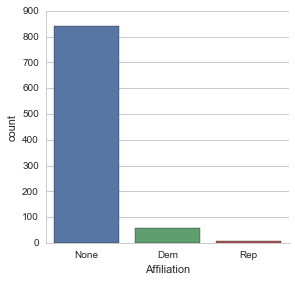

In [43]:
#Counts of affiliation
sns.factorplot('Affiliation',data=poll_df,kind='count')

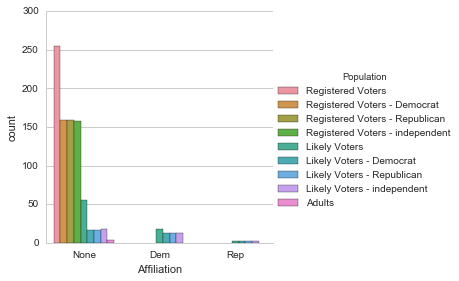

In [44]:
#Lets take a look at how voters are registered vs. their affiliation
sns.factorplot('Affiliation',data=poll_df,hue='Population',kind='count')

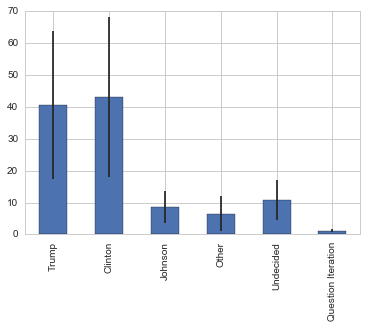

In [45]:
avg = pd.DataFrame(poll_df.mean())
avg.drop('Number of Observations',axis=0,inplace=True)

std=pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)

avg.plot(yerr=std,kind='bar',legend=False)

#Interesting to see such a massive standard deviation.

In [11]:
poll_df['Start Date'].max()

'2016-08-11'

In [12]:
poll_df['Start Date'].min()

'2015-05-19'

In [46]:
from datetime import datetime

In [47]:
poll_df['Difference']=(poll_df.Clinton - poll_df.Trump)/100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Johnson,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Morning Consult,2016-08-11,2016-08-14,2016-08-15T18:50:05Z,2001.0,Registered Voters,Internet,37.0,44.0,NaN,NaN,18.0,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/08/14/poll-tru...,Nonpartisan,None,If the 2016 presidential election were held to...,1,0.07
1,Morning Consult,2016-08-11,2016-08-14,2016-08-15T18:50:05Z,740.0,Registered Voters - Democrat,Internet,8.0,83.0,NaN,NaN,9.0,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/08/14/poll-tru...,Nonpartisan,None,If the 2016 presidential election were held to...,1,0.75
2,Morning Consult,2016-08-11,2016-08-14,2016-08-15T18:50:05Z,610.0,Registered Voters - Republican,Internet,77.0,9.0,NaN,NaN,14.0,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/08/14/poll-tru...,Nonpartisan,None,If the 2016 presidential election were held to...,1,-0.68
3,Morning Consult,2016-08-11,2016-08-14,2016-08-15T18:50:05Z,651.0,Registered Voters - independent,Internet,33.0,33.0,NaN,NaN,34.0,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/08/14/poll-tru...,Nonpartisan,None,If the 2016 presidential election were held to...,1,0.00
4,Morning Consult,2016-08-11,2016-08-14,2016-08-15T18:50:05Z,2001.0,Registered Voters,Internet,33.0,39.0,9.0,4.0,14.0,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/08/14/poll-tru...,Nonpartisan,None,If the 2016 presidential election were held to...,2,0.06


In [49]:
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Johnson,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,NaN,2.5,14.00,1.0,0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,NaN,17.75,1.0,0.1225
2,2015-06-21,1005.00,34.00,51.00,NaN,3.0,12.00,1.0,0.1700
3,2015-06-26,890.00,36.75,57.00,NaN,6.0,0.00,1.0,0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,NaN,16.00,1.0,0.1425


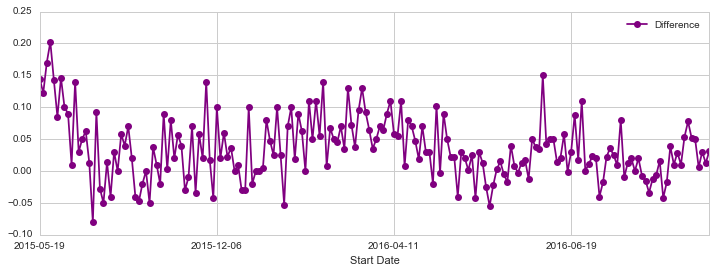

In [53]:
#Note: When the polls favor clinton we see a point plotted above 0.  If they favor trump they are plotted below 0.
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),color='purple',marker='o',xlim=(160,191))

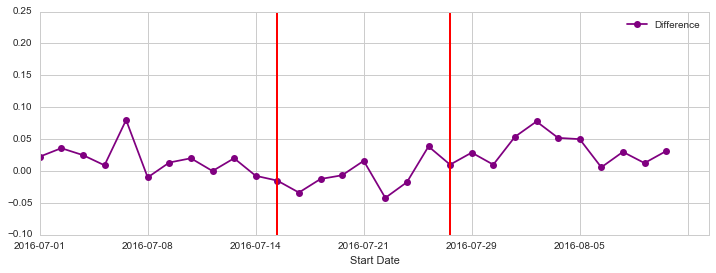

In [78]:
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),color='purple',marker='o',xlim=(160,191))

#Democratic Convention July 28th
plt.axvline(x=179, linewidth=2,color='red')

#Republican Convention July 10th
plt.axvline(x=171,linewidth=2,color='red')

In [79]:
#Looks like the republican convention boosted Trumps short term results but the Democratic convention has put Clinton on an/
#upward boost that has yet to let up.  

,Start Date,Number of Observations,Trump,Clinton,Johnson,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,NaN,2.5,14.00,1.0,0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,NaN,17.75,1.0,0.1225
2,2015-06-21,1005.00,34.00,51.00,NaN,3.0,12.00,1.0,0.1700
3,2015-06-26,890.00,36.75,57.00,NaN,6.0,0.00,1.0,0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,NaN,16.00,1.0,0.1425


In [81]:
poll_df_original = pd.read_csv('desktop/2016-general-election-trump-vs-clinton-vs-johnson.csv')
poll_df_original.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Johnson,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Morning Consult,2016-08-11,2016-08-14,2016-08-15T18:50:05Z,2001.0,Registered Voters,Internet,37.0,44.0,NaN,NaN,18.0,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/08/14/poll-tru...,Nonpartisan,None,If the 2016 presidential election were held to...,1
1,Morning Consult,2016-08-11,2016-08-14,2016-08-15T18:50:05Z,740.0,Registered Voters - Democrat,Internet,8.0,83.0,NaN,NaN,9.0,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/08/14/poll-tru...,Nonpartisan,None,If the 2016 presidential election were held to...,1
2,Morning Consult,2016-08-11,2016-08-14,2016-08-15T18:50:05Z,610.0,Registered Voters - Republican,Internet,77.0,9.0,NaN,NaN,14.0,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/08/14/poll-tru...,Nonpartisan,None,If the 2016 presidential election were held to...,1
3,Morning Consult,2016-08-11,2016-08-14,2016-08-15T18:50:05Z,651.0,Registered Voters - independent,Internet,33.0,33.0,NaN,NaN,34.0,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/08/14/poll-tru...,Nonpartisan,None,If the 2016 presidential election were held to...,1
4,Morning Consult,2016-08-11,2016-08-14,2016-08-15T18:50:05Z,2001.0,Registered Voters,Internet,33.0,39.0,9.0,4.0,14.0,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/08/14/poll-tru...,Nonpartisan,None,If the 2016 presidential election were held to...,2
